In [ ]:
import matplotlib.pyplot as plt
plt.plot([1])

import numpy as np
import gymnasium as gym
from gymnasium import spaces

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sax

from math import e

class filter_env(gym.Env):

    def __init__(self, render_mode="console"):
        # print("a")
        super(filter_env, self).__init__()

        self.ring_length = 0 # normalized
        self.coupling = 0

        self.action_space = spaces.Box(
            low=-1, high=1, shape=(2,), dtype=np.float32
        )
        self.observation_space = spaces.Box(
            low=-1, high=1, shape=(2,), dtype=np.float32
        )

        self.obs_array = []
        self.reward_array = []
        self.action_array = []


    def reset(self, seed=None, options=None):
        # print("b")

        super().reset(seed=seed, options=options)

        self.ring_length = 0
        self.coupling = 0

        return np.array([self.ring_length, self.coupling]).astype(np.float32), {} 

    def loss_function_2(self, ring_length, coupling):
        # print("c")

        loss = ((ring_length-0.4) ** 2 + (coupling+0.6) ** 2)
        return loss

    def step(self, action):
        # print("d")

        if ((action[0] < 0) & (self.ring_length+action[0]>-1)) | ((action[0] > 0) & (self.ring_length+action[0]<1)):
            self.ring_length += float(action[0])
            punishment_1 = 0
        else:
            punishment_1 = 1

        if ((action[1] < 0) & (self.coupling+action[1]>-1)) | ((action[1] > 0) & (self.coupling+action[1]<1)):
            self.coupling += float(action[1])
            punishment_2 = 0
        else:
            punishment_2 = 1

        punishment_3 = (abs(action[0])+abs(action[1]))*0.5

        # reward = 1-self.loss_function_2(self.ring_length, self.coupling)
        reward = (1-self.loss_function_2(self.ring_length, self.coupling))
        reward = reward-(punishment_1+punishment_2+punishment_3)
     
        reward = float(reward)
        
        self.obs_array = self.obs_array + [[self.ring_length, self.coupling]]
        self.reward_array = self.reward_array + [reward]
        self.action_array = self.action_array + [action]

        if reward>0.99:
            terminated = True
            truncated = False  # we do not limit the number of steps here
        
            display(self.reward_array[len(self.reward_array)-1])
            display("Final results: x = " + str(self.ring_length) + ", y = " + str(self.coupling) + ", reward = "+str(self.reward_array[len(self.reward_array)-1]) )

            plt.figure()
            plt.plot(self.reward_array)
            plt.xlabel("steps")
            plt.ylabel("reward")
            plt.grid()

            obs_array_ = np.array(self.obs_array)
            action_array_ = np.array(self.action_array)

            plt.figure()
            plt.plot(obs_array_[:,0])
            plt.plot(obs_array_[:,1])
            plt.xlabel("steps")
            plt.ylabel("x, y")
            plt.grid()

            plt.figure()
            plt.plot(action_array_[:,0])
            plt.plot(action_array_[:,1])
            plt.xlabel("steps")
            plt.ylabel("x-action, y-action")
            plt.grid()           
        else:
            terminated = False
            truncated = False  # we do not limit the number of steps here


        info = {}

        return (
            np.array([self.ring_length, self.coupling]).astype(np.float32),
            reward,
            terminated,
            truncated,
            info,
        )


    def close(self):
        # print("e")

        pass


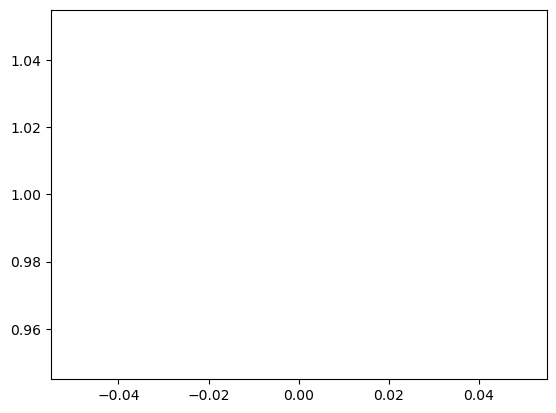

In [1]:
import matplotlib.pyplot as plt
plt.plot([1])

import numpy as np
import gymnasium as gym
from gymnasium import spaces

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sax

from math import e

class filter_env(gym.Env):

    def __init__(self, render_mode="console"):
        # print("a")
        super(filter_env, self).__init__()

        self.ring_length = 0 # normalized
        self.coupling = 0

        self.action_space = spaces.Box(
            low=-1, high=1, shape=(2,), dtype=np.float32
        )
        self.observation_space = spaces.Box(
            low=-1, high=1, shape=(2,), dtype=np.float32
        )

    def reset(self, seed=None, options=None):
        # print("b")

        super().reset(seed=seed, options=options)

        self.ring_length = 0
        self.coupling = 0

        return np.array([self.ring_length, self.coupling]).astype(np.float32), {} 

    def loss_function_2(self, ring_length, coupling):
        # print("c")

        loss = ((ring_length-0.4) ** 2 + (coupling+0.6) ** 2)
        return loss

    def step(self, action):
        # print("d")

        if ((action[0] <= 0) & (self.ring_length+action[0]>-1)) | ((action[0] >= 0) & (self.ring_length+action[0]<1)):
            self.ring_length += float(action[0])
            punishment_1 = 0
        else:
            punishment_1 = 1

        if ((action[1] <= 0) & (self.coupling+action[1]>-1)) | ((action[1] >= 0) & (self.coupling+action[1]<1)):
            self.coupling += float(action[1])
            punishment_2 = 0
        else:
            punishment_2 = 1

        punishment_3 = (abs(action[0])+abs(action[1]))*0.5

        # reward = 1-self.loss_function_2(self.ring_length, self.coupling)
        reward = (1-self.loss_function_2(self.ring_length, self.coupling))
        reward = reward-(punishment_1+punishment_2+punishment_3)
     
        reward = float(reward)
        
        terminated = False
        truncated = False  # we do not limit the number of steps here


        info = {}

        return (
            np.array([self.ring_length, self.coupling]).astype(np.float32),
            reward,
            terminated,
            truncated,
            info,
        )


    def close(self):
        # print("e")

        pass


In [2]:
from stable_baselines3.common.env_checker import check_env
env = filter_env()
# If the environment don't follow the interface, an error will be thrown
check_env(env, warn=True)

from stable_baselines3 import PPO, A2C, DQN, DDPG
from stable_baselines3.common.env_util import make_vec_env

# Instantiate the env
vec_env = make_vec_env(filter_env, n_envs=1)

In [ ]:
# from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
# n_actions = env.action_space.shape[-1]
# action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
# model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
# model.learn(total_timesteps=1, log_interval=10)

c:\Users\oaper\anaconda3\Lib\site-packages\stable_baselines3\ppo\ppo.py:155: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 100`, after every 1 untruncated mini-batches, there will be a truncated mini-batch of size 36
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=100 and n_envs=1)
  warnings.warn(


Output()

c:\Users\oaper\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


'Final results: x = 0.3710986, y = -0.55872166, reward = [0.9974608]'

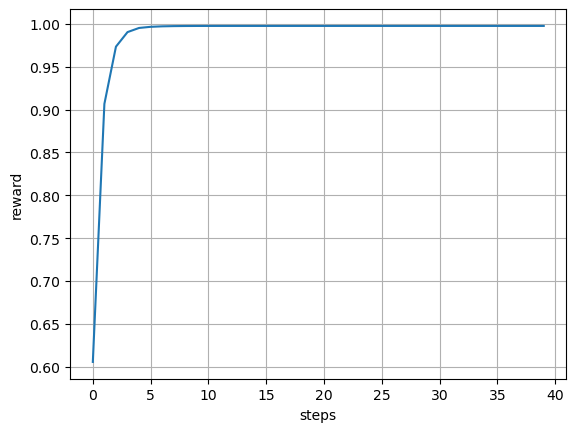

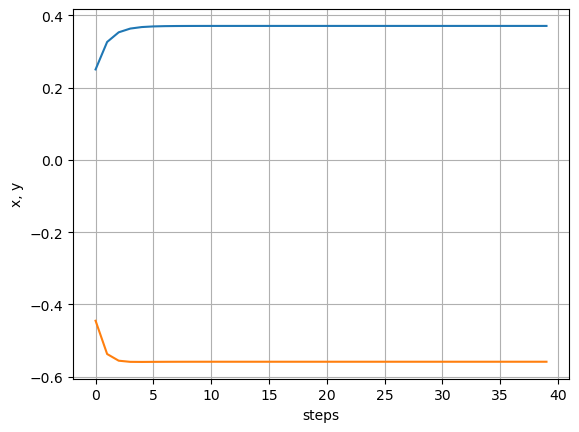

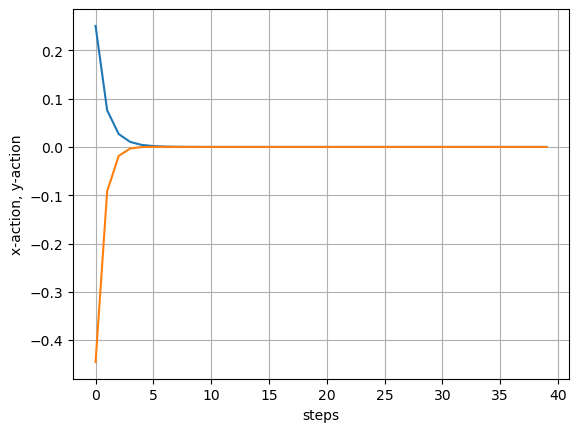

In [3]:
# Train the agent
model = PPO("MlpPolicy", env, verbose=0, n_steps=100, gamma=0.99).learn(40000, progress_bar=True)

# Test the trained agent
# using the vecenv


obs = vec_env.reset()
obs_array = []
reward_array = []
action_array = []
n_steps = 40
steps_array = np.linspace(1,n_steps,n_steps)
for step in steps_array:
    action, _ = model.predict(obs, deterministic=True)
    #print(f"Step {step + 1}")
    # print("Action: ", action)
    obs, reward, done, info = vec_env.step(action)
    # print("obs=", obs, "reward=", reward, "done=", done)
    vec_env.render()
    obs_array = obs_array + [obs]
    reward_array = reward_array + [reward]
    action_array = action_array + [action]
    # if reward>1.95:
    #     # Note that the VecEnv resets automatically
    #     # when a done signal is encountered
    #     print("Goal reached!", "reward=", reward)
    #     break

display("Final results: x = " + str(obs[0][0]) + ", y = " + str(obs[0][1]) + ", reward = "+str(reward) )

plt.figure()
plt.plot(reward_array)
plt.xlabel("steps")
plt.ylabel("reward")
plt.grid()

obs_array_ = np.array(obs_array)
action_array_ = np.array(action_array)

plt.figure()
plt.plot(obs_array_[:,:,0])
plt.plot(obs_array_[:,:,1])
plt.xlabel("steps")
plt.ylabel("x, y")
plt.grid()

plt.figure()
plt.plot(action_array_[:,:,0])
plt.plot(action_array_[:,:,1])
plt.xlabel("steps")
plt.ylabel("x-action, y-action")
plt.grid()


In [ ]:
# Train the agent
model = PPO("MlpPolicy", env, verbose=0, n_steps=100, gamma=0.99).learn(10000, progress_bar=True)

# Test the trained agent
# using the vecenv

vec_env.close()
